<a href="https://colab.research.google.com/github/MingzheHu-Duke/Emory_BMI500/blob/main/Better_Data_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Better Data Treatment  
  
This Note Book will follow the following pipeline:  


*   Collect Data
*   Organize Data
*   Clean Data
*   Explore Data
*   Apply models, algorithms, etc
*   Summarize data and results



In [30]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collect Data

In [ ]:
!test -f geyser.csv && echo "$FILE Meta Data Retreived!."

 Meta Data Retreived!.


# Organize Data

In [55]:
# Read the meta data into a data frame
df = pd.read_csv("geyser.csv", sep=",", skiprows=range(30))
# Peek the dataframe
df.head(11)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


In [53]:
print("There are {} rows in the meta data.".format(len(df)))

There are 280 rows in the meta data.


Now let's check the column types of this data frame:

In [58]:
df.dtypes

eruptions    object
waiting      object
dtype: object

We can find that the data type of both of the columns are object  
instead of "float32" or "float64" as we expected.  
This indicates that there must be corrupted data (non numeric) in the  
dataframe we created, so we have to fix it.

In [52]:
# For exmaple, the 1 is mistyped into l
df.iloc[152-32]["eruptions"]

'1.8l7'

In [118]:
def correct_num_string(non_num_string):
  try:
    ans = non_num_string.replace("l", "1")
    ans = ans.replace("i", "1")
    ans = ans.replace("I", "1")
    ans = ans.replace("o", "0")
    ans = ans.replace("O", "0")
  except AttributeError:
    ans = non_num_string
  return ans

In [147]:
def org_data(df_in):
  df_out = df_in.applymap(correct_num_string)
  df_out = df_out.apply(pd.to_numeric, errors="coerce")
  return df_out

In [151]:
# Now let's organize our data
organized_df = org_data(df)
# Check the data types of columns again
organized_df.dtypes
# We can see that the data types are correct now

eruptions    float64
waiting      float64
dtype: object

In [152]:
# The wrong letter is also corrected
print(organized_df.iloc[185-32]["eruptions"])

5.033


In [155]:
# We should save the organized data into a file now
organized_df.to_csv("organized_geyser.csv")

# Clean Data

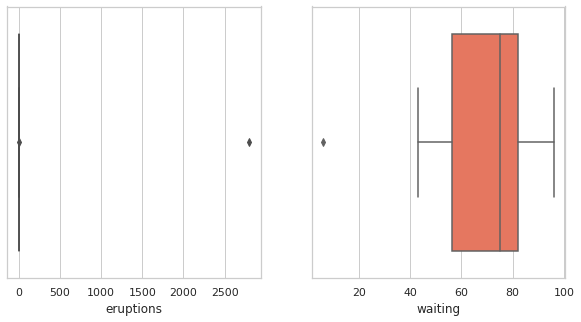

In [176]:
# let's have a breif look at the distribution of the data
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = axes[0]
ax2 = axes[1]
sns.boxplot(ax=ax1, data=organized_df, x="eruptions")
sns.boxplot(ax=ax2, data=organized_df, x="waiting", palette="Reds")

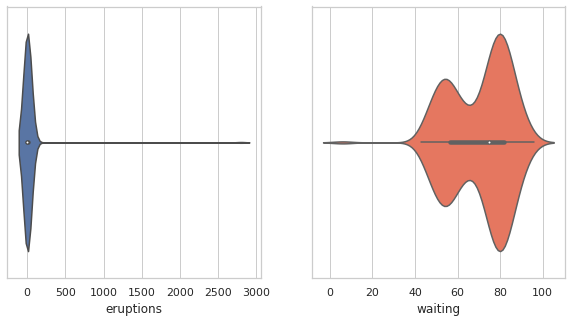

In [177]:
# let's have a breif look at the distribution of the data
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = axes[0]
ax2 = axes[1]
sns.violinplot(ax=ax1, data=organized_df, x="eruptions")
sns.violinplot(ax=ax2, data=organized_df, x="waiting", palette="Reds")

In [241]:
df = organized_df
print("The minmum value of each column is:")
df.min()

The minmum value of each column is:


eruptions   -1.93
waiting      6.00
dtype: float64

In [179]:
print("The maximum value of each column is:")
df.max()

The maximum value of each column is:


eruptions    2800.0
waiting        96.0
dtype: float64

We noticed some very extreme and abnormal data points in the graph  
which are outliers that we need to remove.

In [243]:
def nan_row(df_in):
  rows_with_nan = []
  for index, row in df_in.iterrows():
      is_nan_series = row.isnull()
      if is_nan_series.any():
          rows_with_nan.append(index)

  return rows_with_nan

In [252]:
print("The line index that include the missing data are:")
print(nan_row(df))
print("The percentage of missing data is:")
print("{:.3%}".format(2/len(df)))

The line index that include the missing data are:
[10, 101]
The percentage of missing data is:
0.714%


Since there are only two sets of missing data, we could just remove  
them, instead of using interpolation.  
If you want to use interploation for this data set, one of the published    
literature mentioned to use linear interpolation, but I don't think that  
sense.  
https://www.pnas.org/content/118/2/e2020943118

In [188]:
# Negative values does not make sense in our data
df = df[(df.eruptions >= 0) | (df.waiting >= 0)]

In [207]:
# Now we need to remove the outliers
# The data above 95% percent, and below 5% percent will be removed
lower_e = df.eruptions.quantile(.05)
upper_e = df.eruptions.quantile(.95)

lower_w = df.waiting.quantile(.05)
upper_w = df.waiting.quantile(.95)

In [212]:
df_cleaned = df[(lower_e < df.eruptions) & (df.eruptions < upper_e) &
                (lower_w < df.waiting) & (df.waiting < upper_w)]

In [224]:
print("The remaining number of sets of data after \
removing outliers is {}".format(len(df_cleaned)))

The remaining number of sets of data after removing outliers is 223


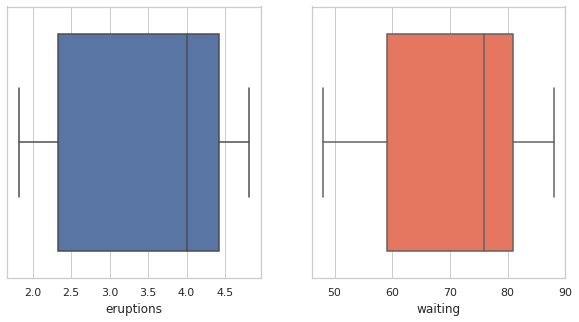

In [217]:
# let's have a breif look at the distribution of the data
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = axes[0]
ax2 = axes[1]
sns.boxplot(ax=ax1, data=df_cleaned, x="eruptions")
sns.boxplot(ax=ax2, data=df_cleaned, x="waiting", palette="Reds")

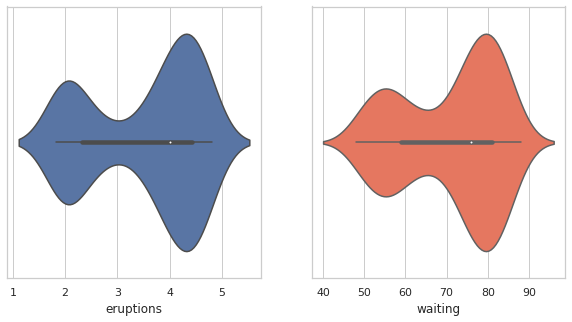

In [214]:
# let's have a breif look at the distribution of the data
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = axes[0]
ax2 = axes[1]
sns.violinplot(ax=ax1, data=df_cleaned, x="eruptions")
sns.violinplot(ax=ax2, data=df_cleaned, x="waiting", palette="Reds")

From the plot we can expect a strong linear relationship between  
eruptions and waiting.

# Explore Data

In [253]:
# Let's take a look of the cleaned data
df_cleaned.describe()

,eruptions,waiting
count,223.000000,223.000000
mean,3.538031,71.139013
std,1.037567,11.823913
min,1.817000,48.000000
25%,2.325000,59.000000
50%,4.000000,76.000000
75%,4.417000,81.000000
max,4.817000,88.000000


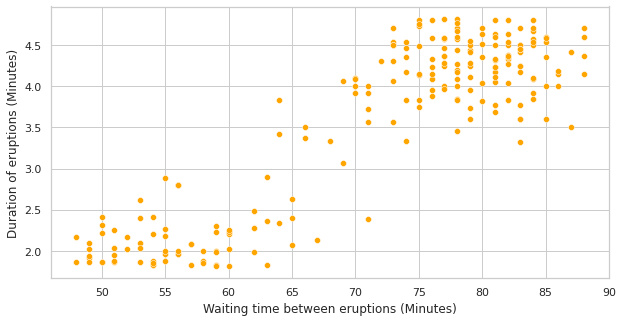

In [264]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df_cleaned, x="waiting", y="eruptions", color="orange")
ax.set(xlabel="Waiting time between eruptions (Minutes)", ylabel="Duration of eruptions (Minutes)")
plt.show()

In [265]:
df_cleaned.to_csv("cleaned_geyeser.csv")

# Explore Data

To analyze the relationship between waiting time and duration of the  
eruption, we will try the following regressor:  
(Three Linear Models and One Ensemble Model)  


*   Linear Regressor
*   Lasso Regressor


*   Ridge Regressor
*   Random Forest Regressor





\* Consider the requirements of this home work, I will not fine tune 
the parameters of these different models. 

In [287]:
# Import the sklearn regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [296]:
X = df_cleaned.waiting.to_numpy().reshape(-1, 1)
y = df_cleaned.eruptions.to_numpy().reshape(-1, 1).ravel()

In [297]:
# Split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                            random_state=2021, shuffle=True)

In [288]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

0.43581405000666024

In [335]:
def train_test_model(model, feature, label):
  model.fit(feature[0], label[0])
  y_pred = model.predict(feature[1])
  MAE = metrics.mean_absolute_error(label[1], y_pred)
  MSE = metrics.mean_squared_error(label[1], y_pred)
  R2 = metrics.r2_score(label[1], y_pred)
  print("Mean Absolute Error: {}\nMean Squared Error:\
   {}\nR Squared: {}".format(MAE, MSE, R2))
  plt.figure()
  ax1 = sns.scatterplot(data=df_cleaned, x="waiting", y="eruptions")
  dots = np.arange(35, 95, 0.01)
  sns.lineplot(ax=ax1, x=dots, y=model.predict(dots.reshape(-1, 1)), color="red")
  plt.title(type(model).__name__)
  plt.show()
  return MAE, MSE, R2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean Absolute Error: 0.43581405000666024
Mean Squared Error:   0.2627034828077211
R Squared: 0.7648776901154541


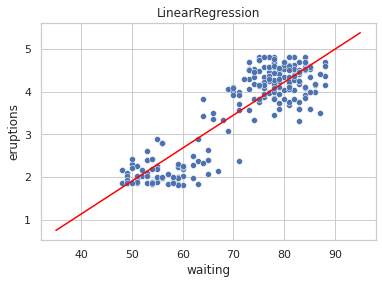



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error: 0.43581605354899156
Mean Squared Error:   0.2627074758659031
R Squared: 0.7648741162874515


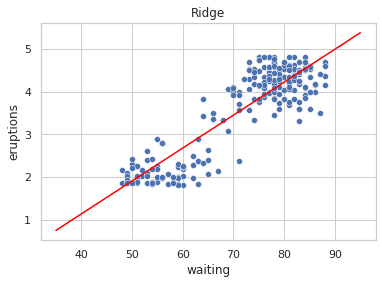



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error: 0.4489027061293673
Mean Squared Error:   0.27874077560821475
R Squared: 0.7505241486730411


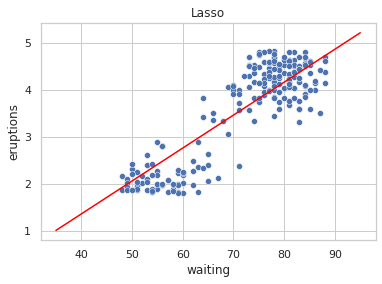



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Mean Absolute Error: 0.3636911178466053
Mean Squared Error:   0.23447052084288267
R Squared: 0.7901464804683936


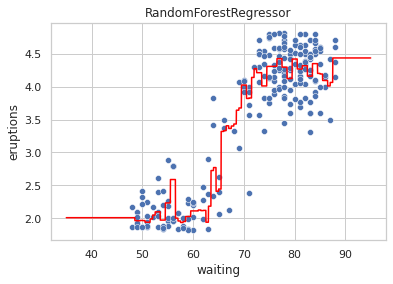

In [336]:
%matplotlib inline
for model in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor()]:
  print(model)
  train_test_model(model, [X_train, X_test], [y_train, y_test])
  print("\n")

# Summarize data and results

From the results we can see that the Waiting time of eruptions and the 
eruptions duration have a strong linear relationship and the random forest
model achieved the best perfpormance.

In [ ]:
# Get the pdf
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [338]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [341]:
!cp drive/My\ Drive/Colab\ Notebooks/Better\ Data\ Treatment.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "Better Data Treatment.ipynb"